In [28]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


In [55]:

dates = []
prices = []


In [51]:

def get_data(filename):
	with open(filename, 'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader)	# skipping column names
		for row in csvFileReader:
           # print ((row[0].split('-')[0]))
			dates.append(int(row[0].split('-')[0]))
			prices.append(float(row[1]))
	return


In [41]:
dates

[]

In [42]:

def predict_price(dates, prices, x):
	dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

	svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
	svr_lin = SVR(kernel= 'linear', C= 1e3)
	svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
	svr_rbf.fit(dates, prices) # fitting the data points in the models
	svr_lin.fit(dates, prices)
	svr_poly.fit(dates, prices)

	plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
	plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
	plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
	plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
	plt.xlabel('Date')
	plt.ylabel('Price')
	plt.title('Support Vector Regression')
	plt.legend()
	plt.show()

	return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]



In [43]:
dates

[]

In [56]:
get_data('goog.csv') # calling get_data method by passing the csv file to it


In [57]:
print ("Dates- ", dates)
print ("Prices- ", prices)



Dates-  [26, 25, 24, 23, 22, 19, 18, 17, 16, 12, 11, 10, 9, 8, 5, 4, 3, 2, 1]
Prices-  [708.58, 700.01, 688.92, 701.45, 707.45, 695.03, 710.0, 699.0, 692.98, 690.26, 675.0, 686.86, 672.32, 667.85, 703.87, 722.81, 770.22, 784.5, 750.46]


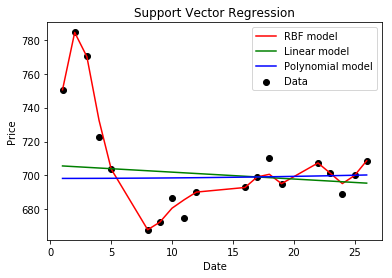

In [60]:
predicted_price = predict_price(dates, prices, 29)  

	 

In [61]:
print ("\nThe stock open price for 29th Feb is:")
print ("RBF kernel: $", str(predicted_price[0]))
print ("Linear kernel: $", str(predicted_price[1]))
print ("Polynomial kernel: $", str(predicted_price[2]))



The stock open price for 29th Feb is:
RBF kernel: $ 692.62204948
Linear kernel: $ 694.23
Polynomial kernel: $ 700.759285758
